In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.graph_objs import Scatter



In [135]:
#charegement du dataset
df = pd.read_csv("Wines.csv")

In [21]:
df.describe()


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

## Distributions

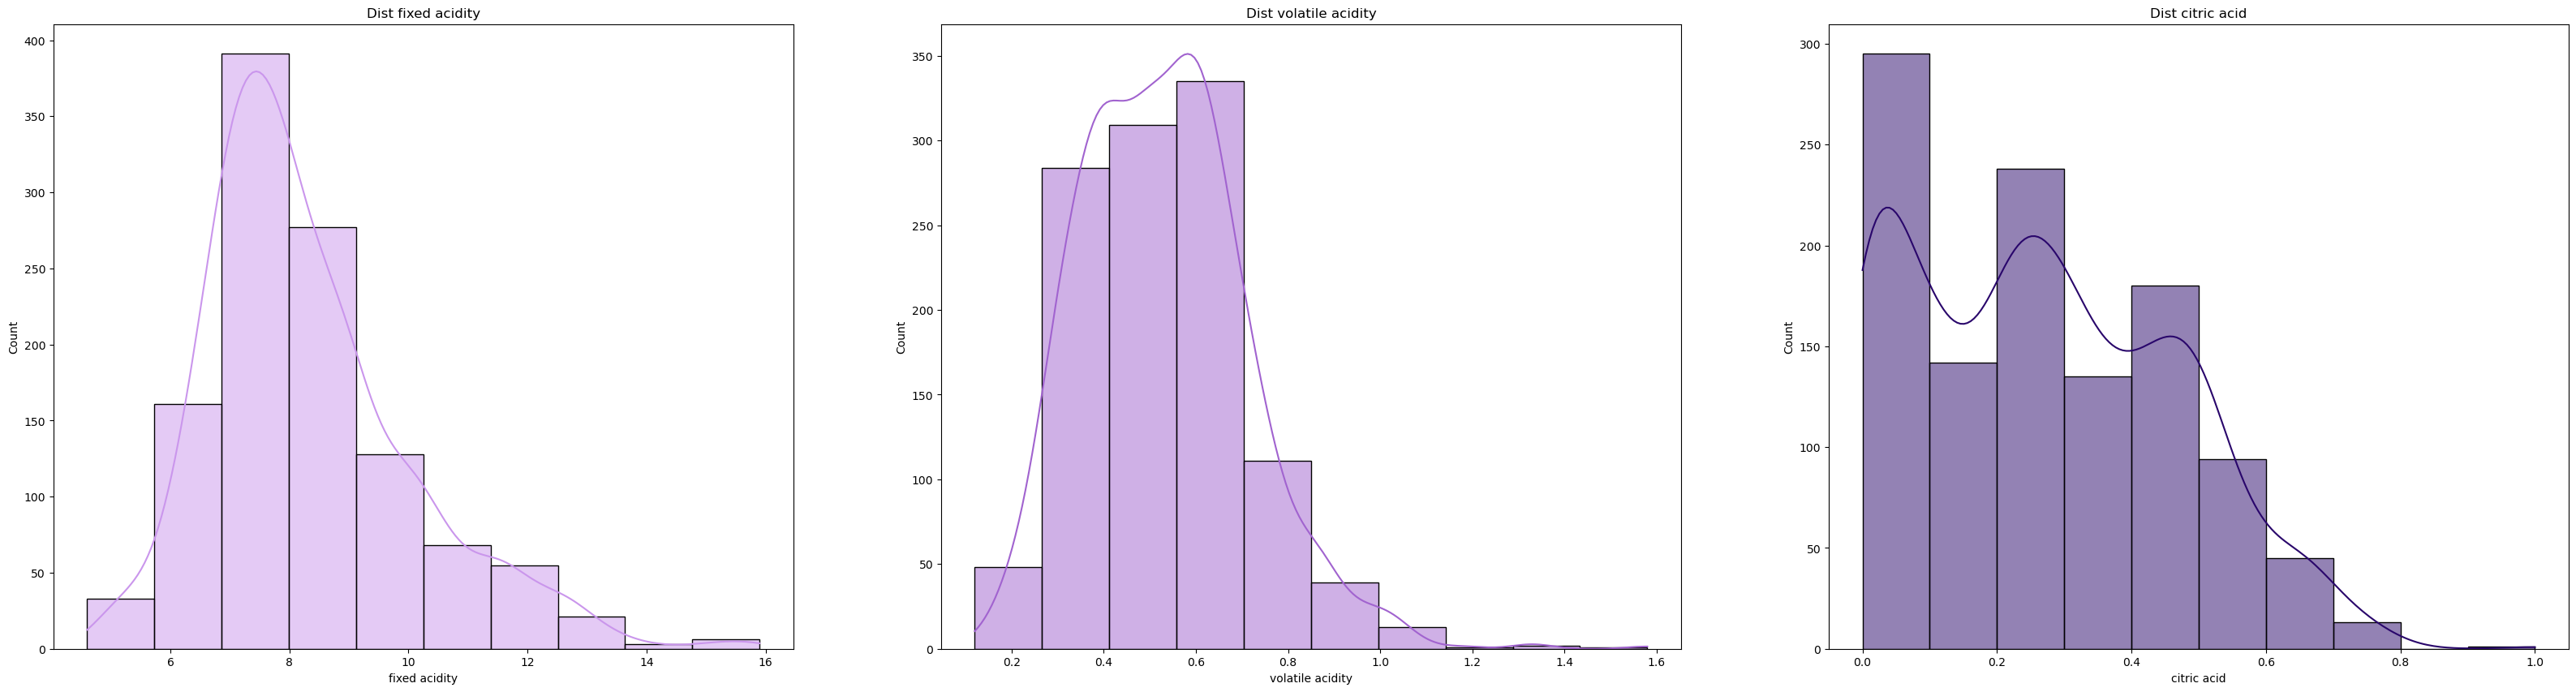

In [28]:
fig, axes = plt.subplots(1, 3, figsize = (40, 10))

sns.histplot(ax=axes[0], x=df["fixed acidity"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#CA96EC").set(title = "Dist fixed acidity");

sns.histplot(ax = axes[1], x = df["volatile acidity"],
             bins = 10,
             cbar = True,
             kde = True,
             color = "#A163CF").set(title = "Dist volatile acidity");

sns.histplot(ax = axes[2], x = df["citric acid"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#29066B").set(title = "Dist citric acid");


Fixed acidity est plutôt bien normalement distribué, volatle acidity et citric acid un peu moins

[Text(0.5, 1.0, "Distribution of 'chlorides'")]

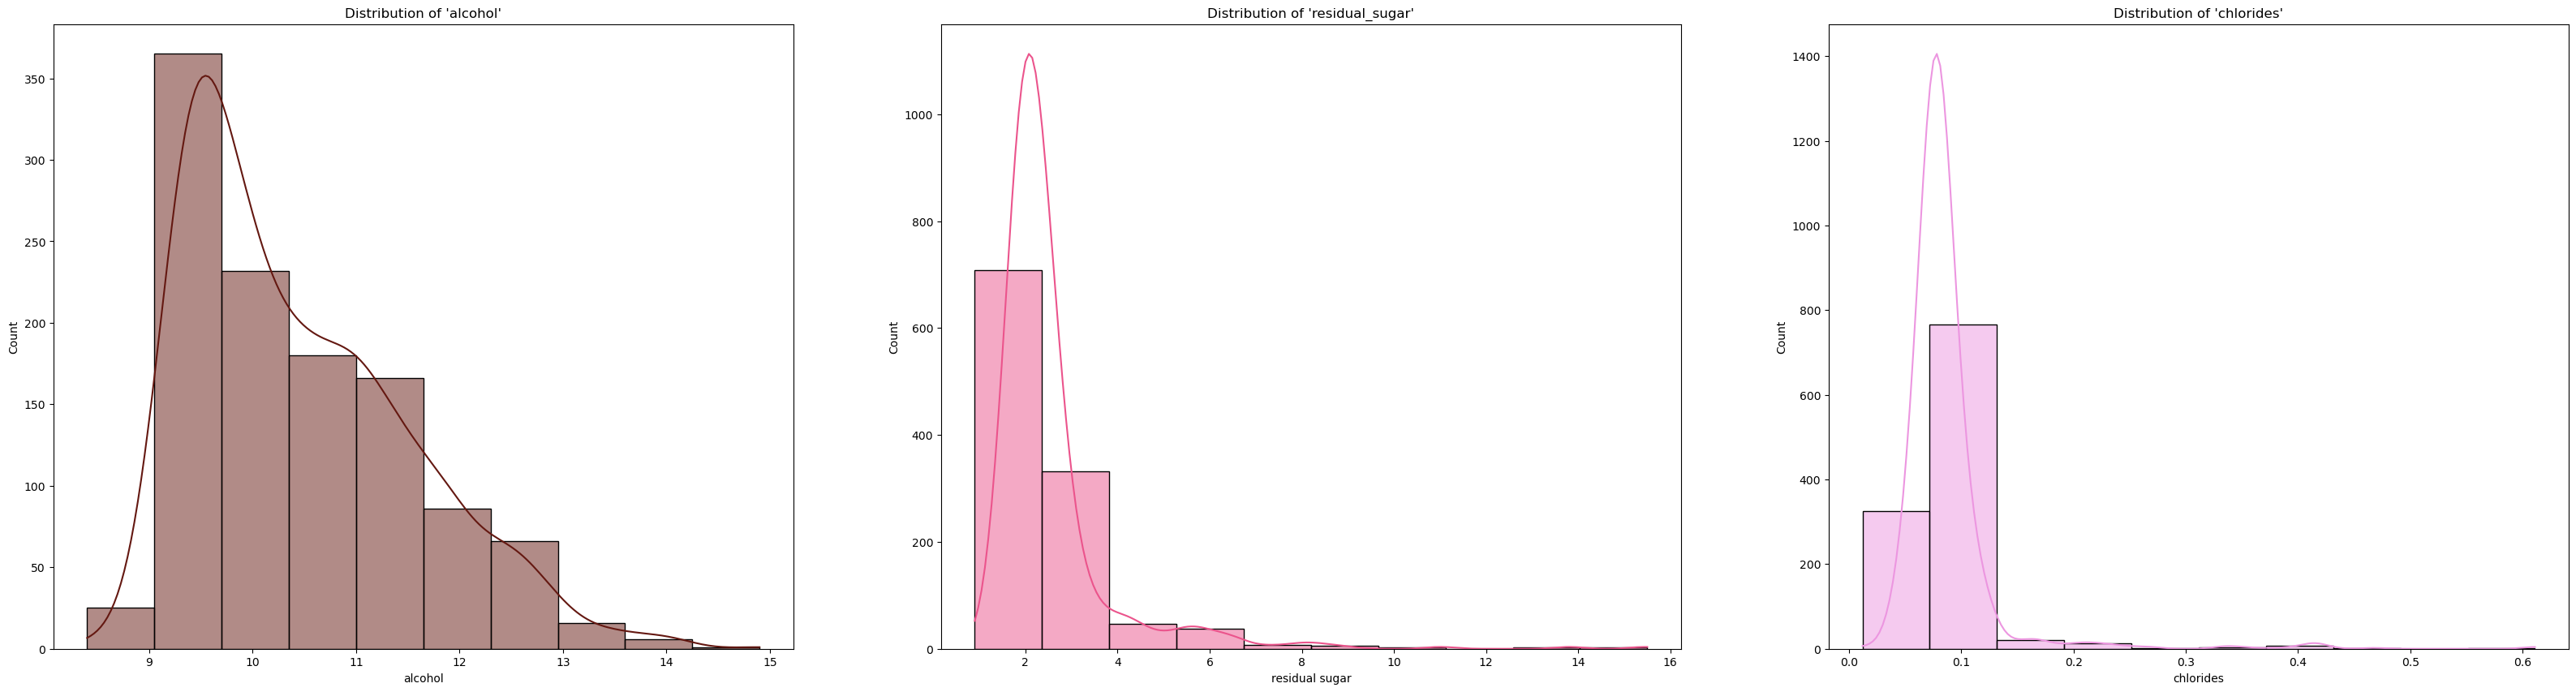

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(40, 10))

sns.histplot(ax=axes[0], x=df["alcohol"],
             bins=10,
             kde=True,
             cbar=True,
             color="#641811").set(title="Distribution of 'alcohol'")

sns.histplot(ax=axes[1], x=df["residual sugar"],
             bins=10,
             kde=True,
             cbar=True,
             color="#EB548C").set(title="Distribution of 'residual_sugar'")

sns.histplot(ax=axes[2], x=df["chlorides"],
             bins=10,
             kde=True,
             cbar=True,
             color="#EC96E0").set(title="Distribution of 'chlorides'")


La distribution de ces variables n'est pas optimale

## Corrélations

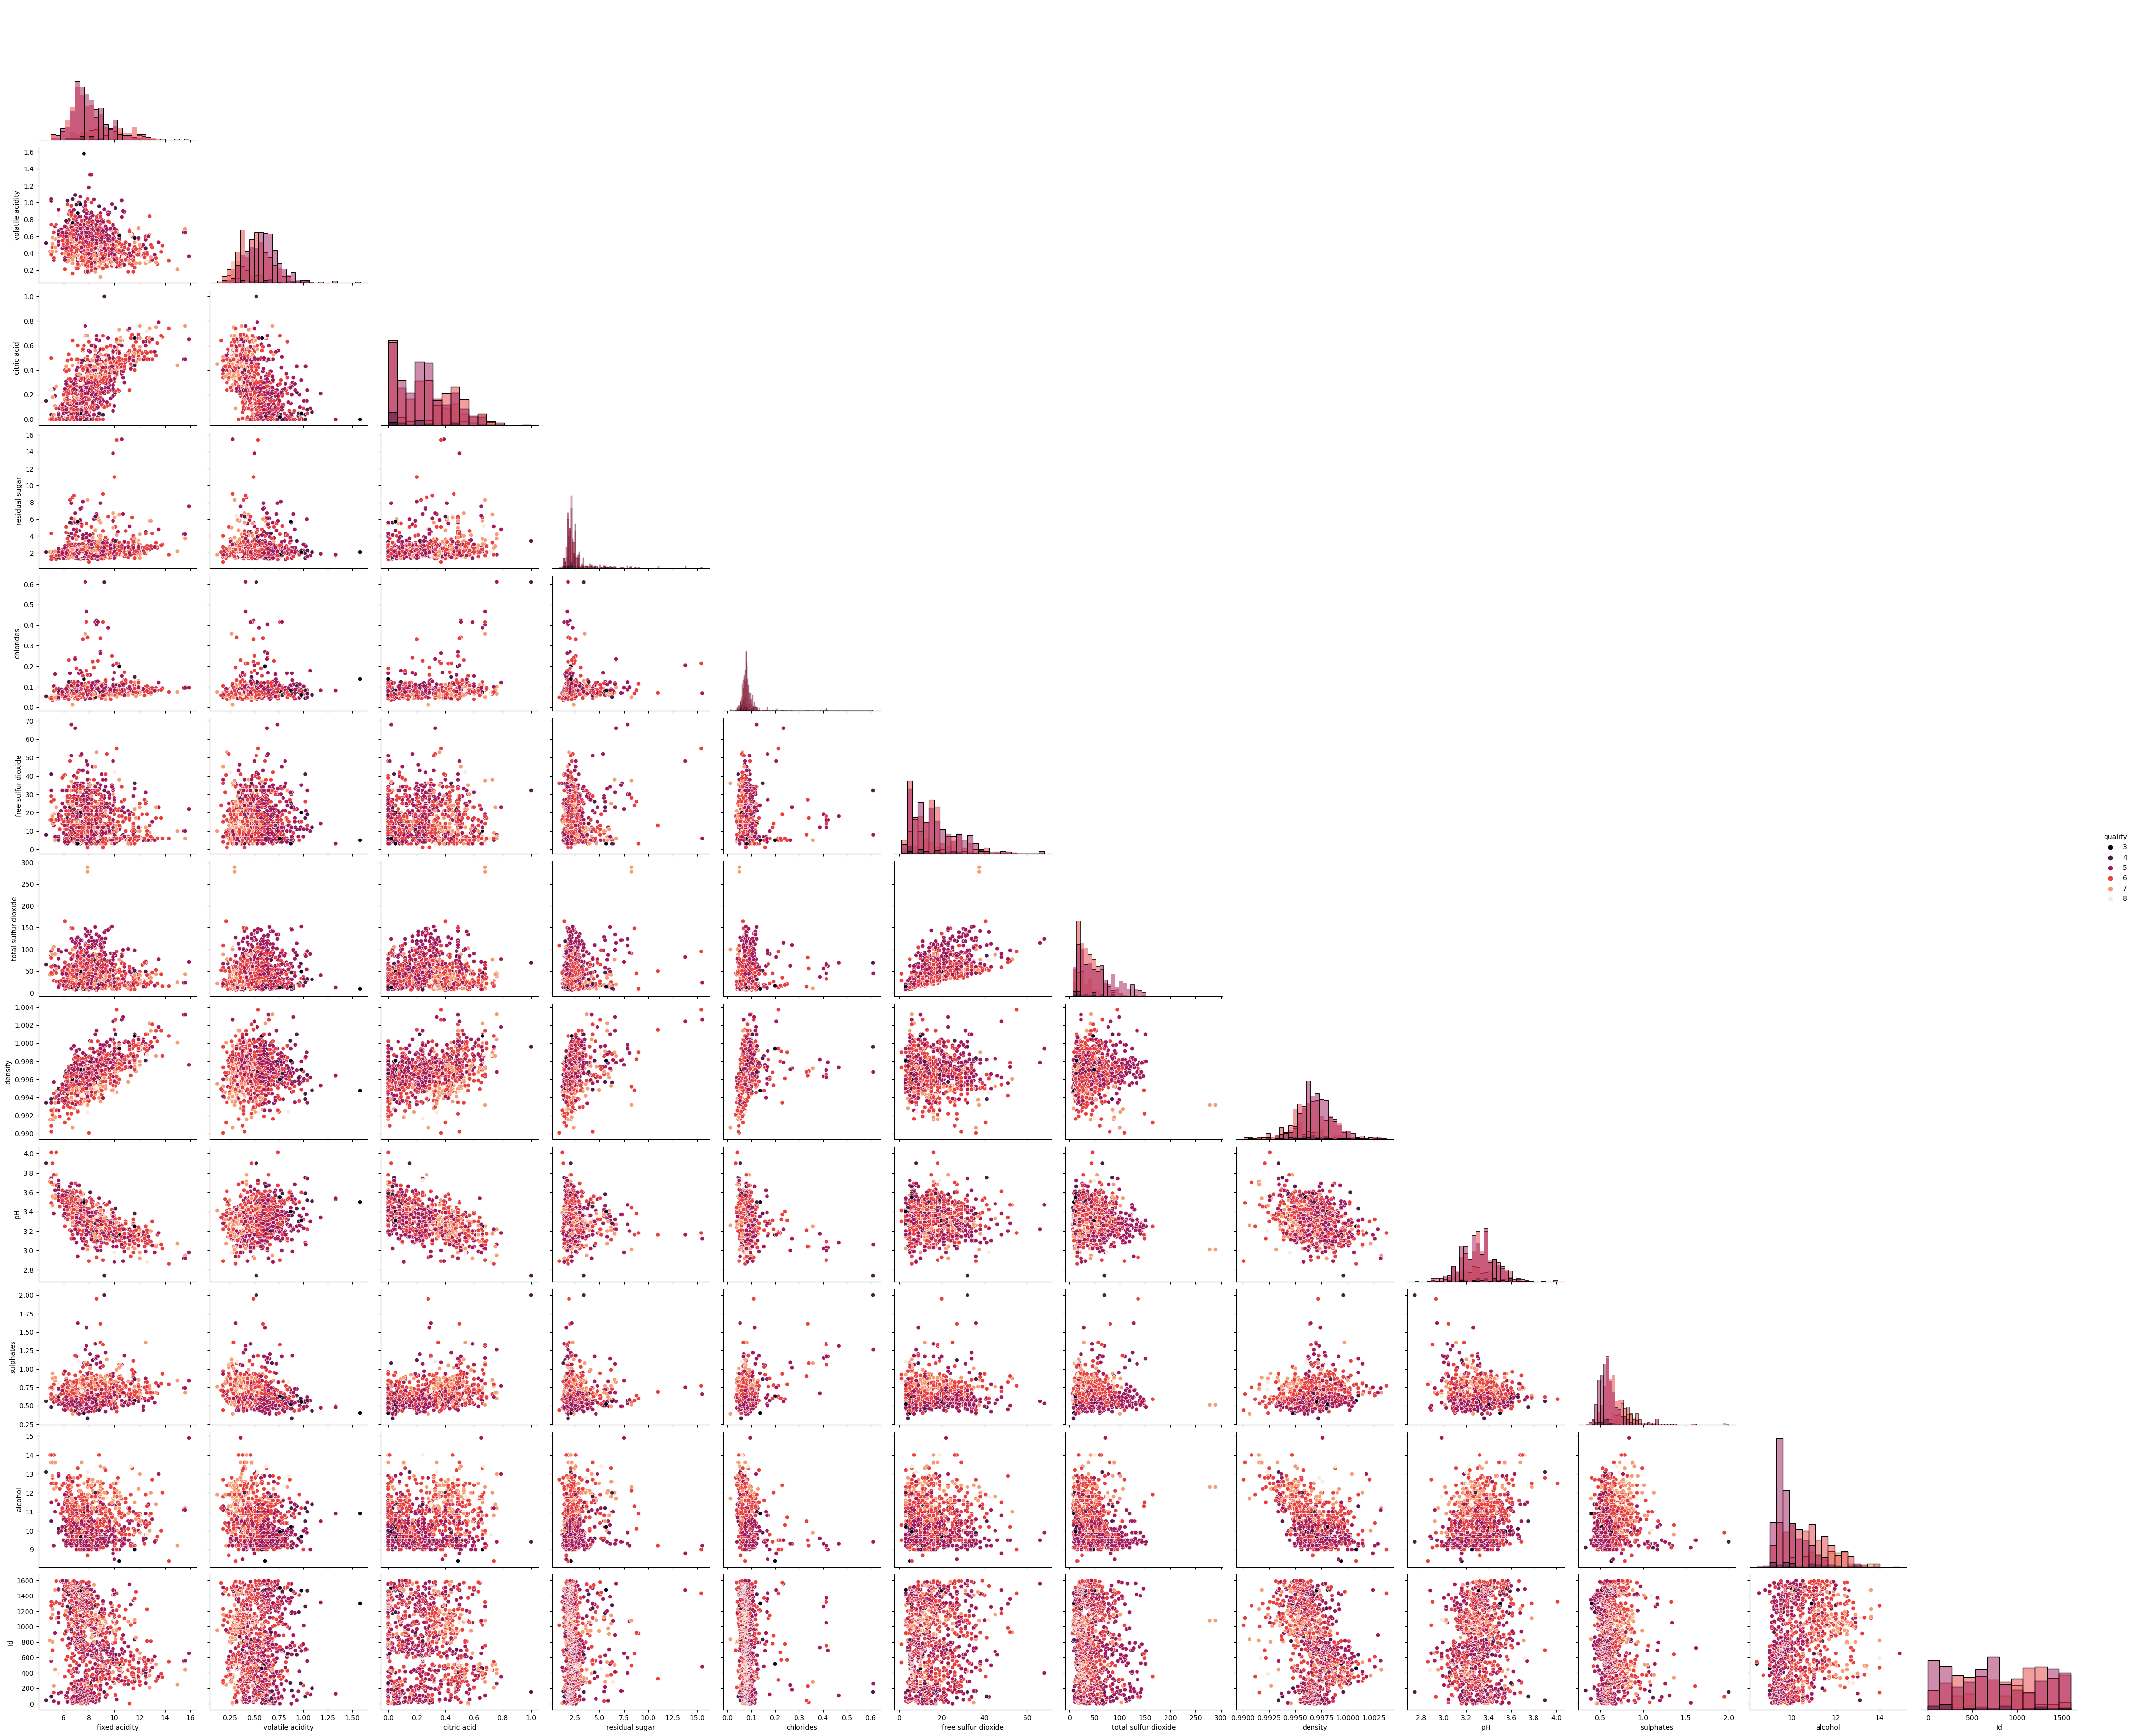

In [32]:
sns.pairplot(df, diag_kind="hist", hue="quality", palette="rocket",
             height=3, aspect=1.2, corner=True)


<AxesSubplot:>

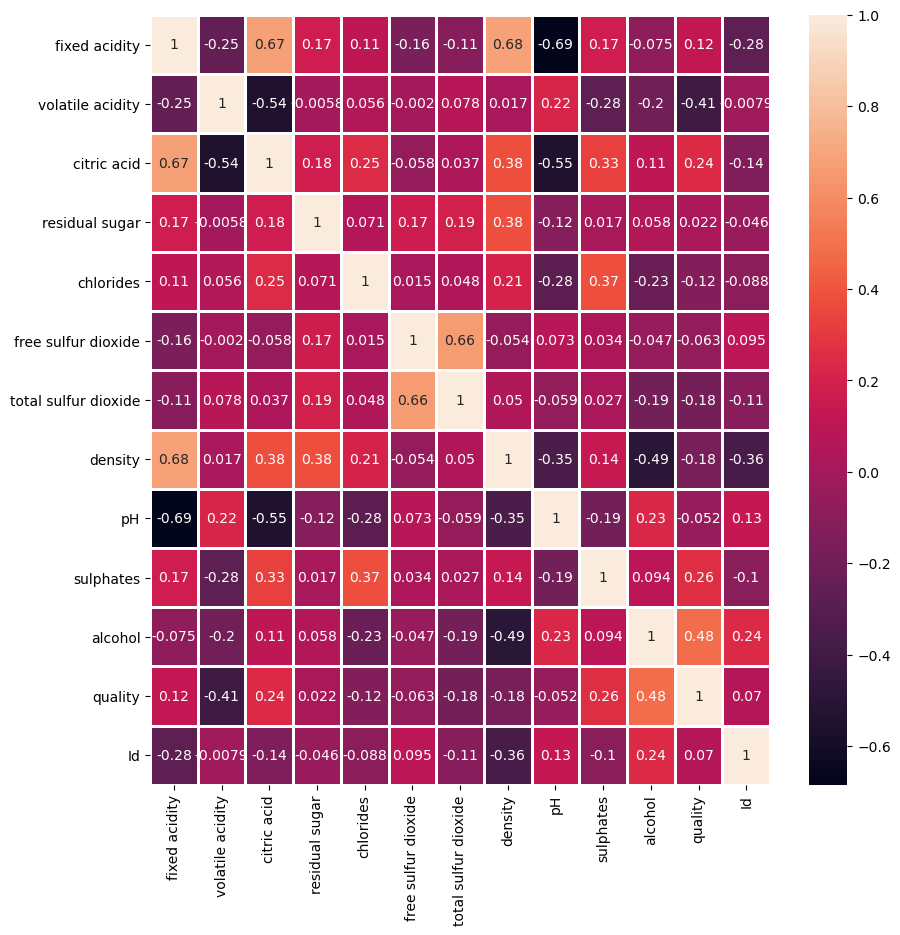

In [61]:
corr = df.corr()
plt.figure(figsize=[10, 10])
sns.heatmap(corr, annot=True, linewidths=1, cmap="rocket")


"Les variables "free sulfur dioxide" et "total sulfur dioxide" présentent une corrélation relativement élevée de 0,67 (positive). De même, une corrélation relativement élevée de -0,68 (négative) existe entre les variables "pH" et "fixed acidity".

In [124]:
# Sélectionner la colonne "quality" de la matrice de corrélation
quality_corr = corr['quality']

# Créer une liste vide pour stocker les variables corrélées à "quality"
correlated_vars = []

# Parcourir la matrice de corrélation
for var in corr:
    if var != 'quality':
        # Si la valeur absolue de la corrélation est supérieure à 0.4 (seuil assurément critiquable)
        if abs(corr[var]['quality']) > 0.4:
            correlated_vars.append(var)

# Afficher la liste des variables corrélées (+/-) à "quality"
print(correlated_vars)


['volatile acidity', 'alcohol']


On peut voir que 'volatile acidity' et 'alcohol' sont corrélées avec la variable cible "quality"
Cela va pouvoir nous servir afin de déterminer le meilleur vin, et le vin "parfait"
Afin de trouver le meilleur vin, nous allons par conséquent nous concentrer sur les critères suivants :
1) Quality
2) Alcohol, il semblerait qu'un vin avec un plutôt fort taux d'alcool implique une bonne qualité avec une corrélation de 0.48 positive
3) volatile acidity, corrélée négativement avec "quality" à hauteur de -0,41, nous allons donc essayer de prendre cette valeur la plus faible possible.
5) Le reste n'est pas très corrélées donc peu importe la valeur, elle n'aura vraisemblablement pas beaucoup d'effet sur la qualité finale.

# Classe "quality"

la valeur de chaque classe est : 
 5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64


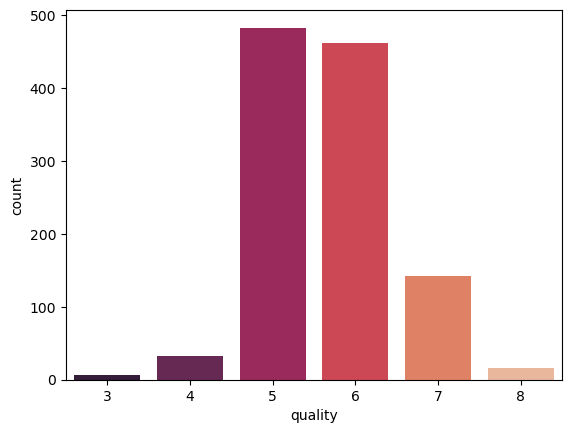

In [129]:
sns.countplot(x="quality", data=df, palette="rocket")
# afficher le nombre de valeurs par classe
print("la valeur de chaque classe est : \n", df["quality"].value_counts())

On peut voir que cette classe n'a des valeurs seulement entre 3 et 8. Aussi les classes ne sont pas réparties équitablement
Nous allons donc regrouper en deux classes, c'est à dire qualité "mauvaise" et qualité "bonne"

la valeur de chaque classe est : 
 2    621
1    522
Name: quality, dtype: int64


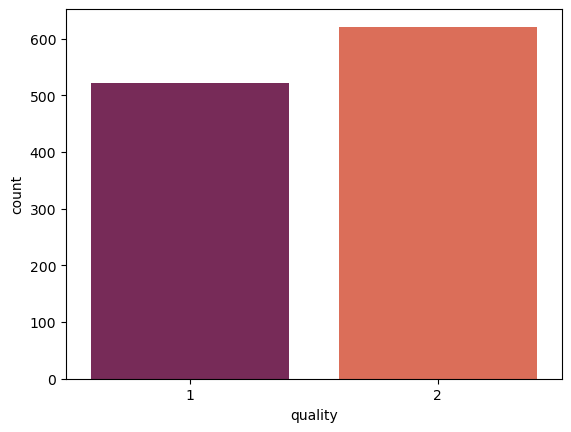

In [136]:
df_wines = df.copy()

#1 : Mauvaise qualité | 2 : Bonne qualité
var_quality = {1: 1, 2: 1, 3: 1, 4: 1, 5: 1,
                6: 2, 7: 2, 8: 2, 9: 2, 10: 2}
df_wines["quality"] = df_wines["quality"].map(var_quality)

# creer un barrplot de la variable "quality"
sns.countplot(x="quality", data=df_wines, palette="rocket")
# afficher le nombre de valeurs par classe
print("la valeur de chaque classe est : \n", df_wines["quality"].value_counts())
